In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="iBtjlD2F0Clrr7okqCCf")
project = rf.workspace("sunflower-detection").project("final-1yr0d")
version = project.version(3)
dataset = version.download("yolov11")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Final-3 in yolov11:: 100%|██████████| 8584/8584 [00:03<00:00, 2546.70it/s]


In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


In [3]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [4]:
!yolo task=detect mode=train model=/kaggle/input/model11/yolo11s.pt data=/kaggle/working/Final-3/data.yaml epochs=50 imgsz=640 plots=True

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/model11/yolo11s.pt, data=/kaggle/working/Final-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

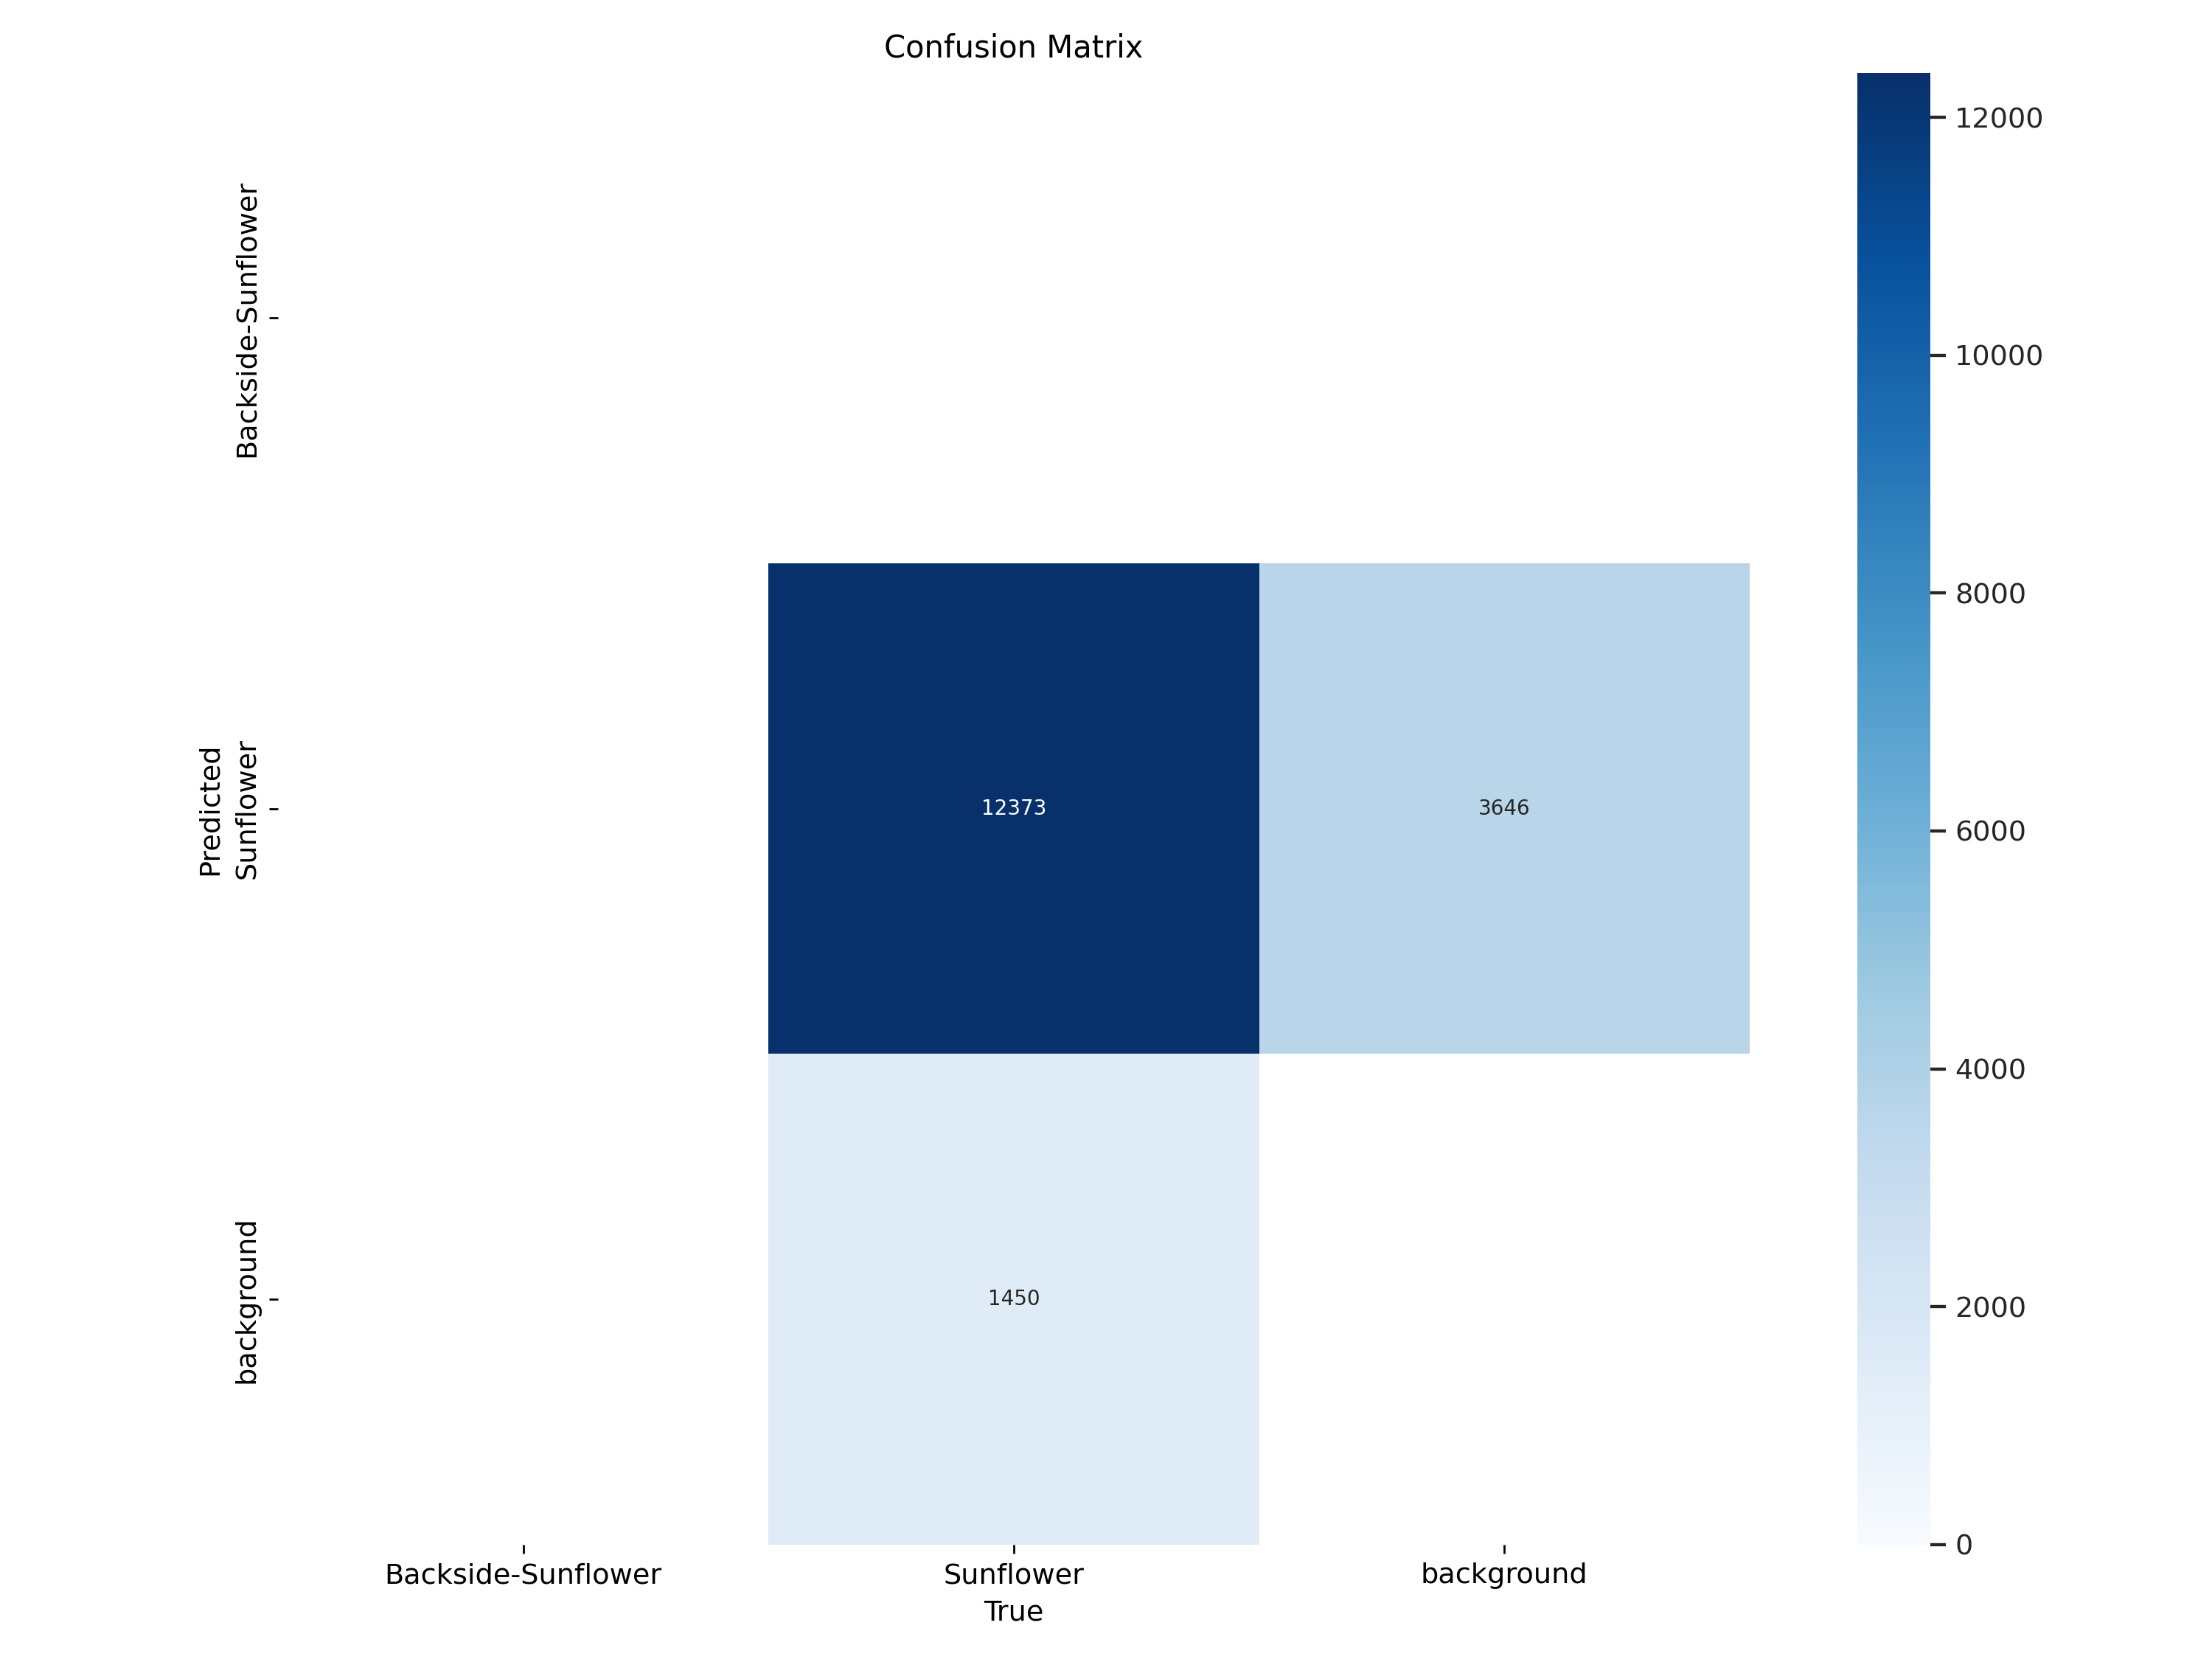

In [5]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

In [6]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/Final-3/test/images save=True

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/165 /kaggle/working/Final-3/test/images/20240116_122814-mp4_frame10_jpg.rf.6b9395125a60f64460804ab762ec2e4d.jpg: 384x640 162 Sunflowers, 45.5ms
image 2/165 /kaggle/working/Final-3/test/images/20240116_122814-mp4_frame18_jpg.rf.f6ec0be3233b0bb66e507a226edc387b.jpg: 384x640 137 Sunflowers, 10.9ms
image 3/165 /kaggle/working/Final-3/test/images/20240116_122814-mp4_frame29_jpg.rf.a9516c02f768f560462517e09f76ed17.jpg: 384x640 137 Sunflowers, 10.8ms
image 4/165 /kaggle/working/Final-3/test/images/20240116_122814-mp4_frame2_jpg.rf.6fb98d5bdfb088e3c4a7f1d8c3403148.jpg: 384x640 147 Sunflowers, 10.8ms
image 5/165 /kaggle/working/Final-3/test/images/20240116_122814-mp4_frame4_jpg.rf.32046d92943125270ea018c4c21bb3a3.jpg: 384x640 156 Sunflowers, 10.8ms
image 6/165 /kaggle/working/Final-3/test/images/20240116_122814-mp4_frame9_

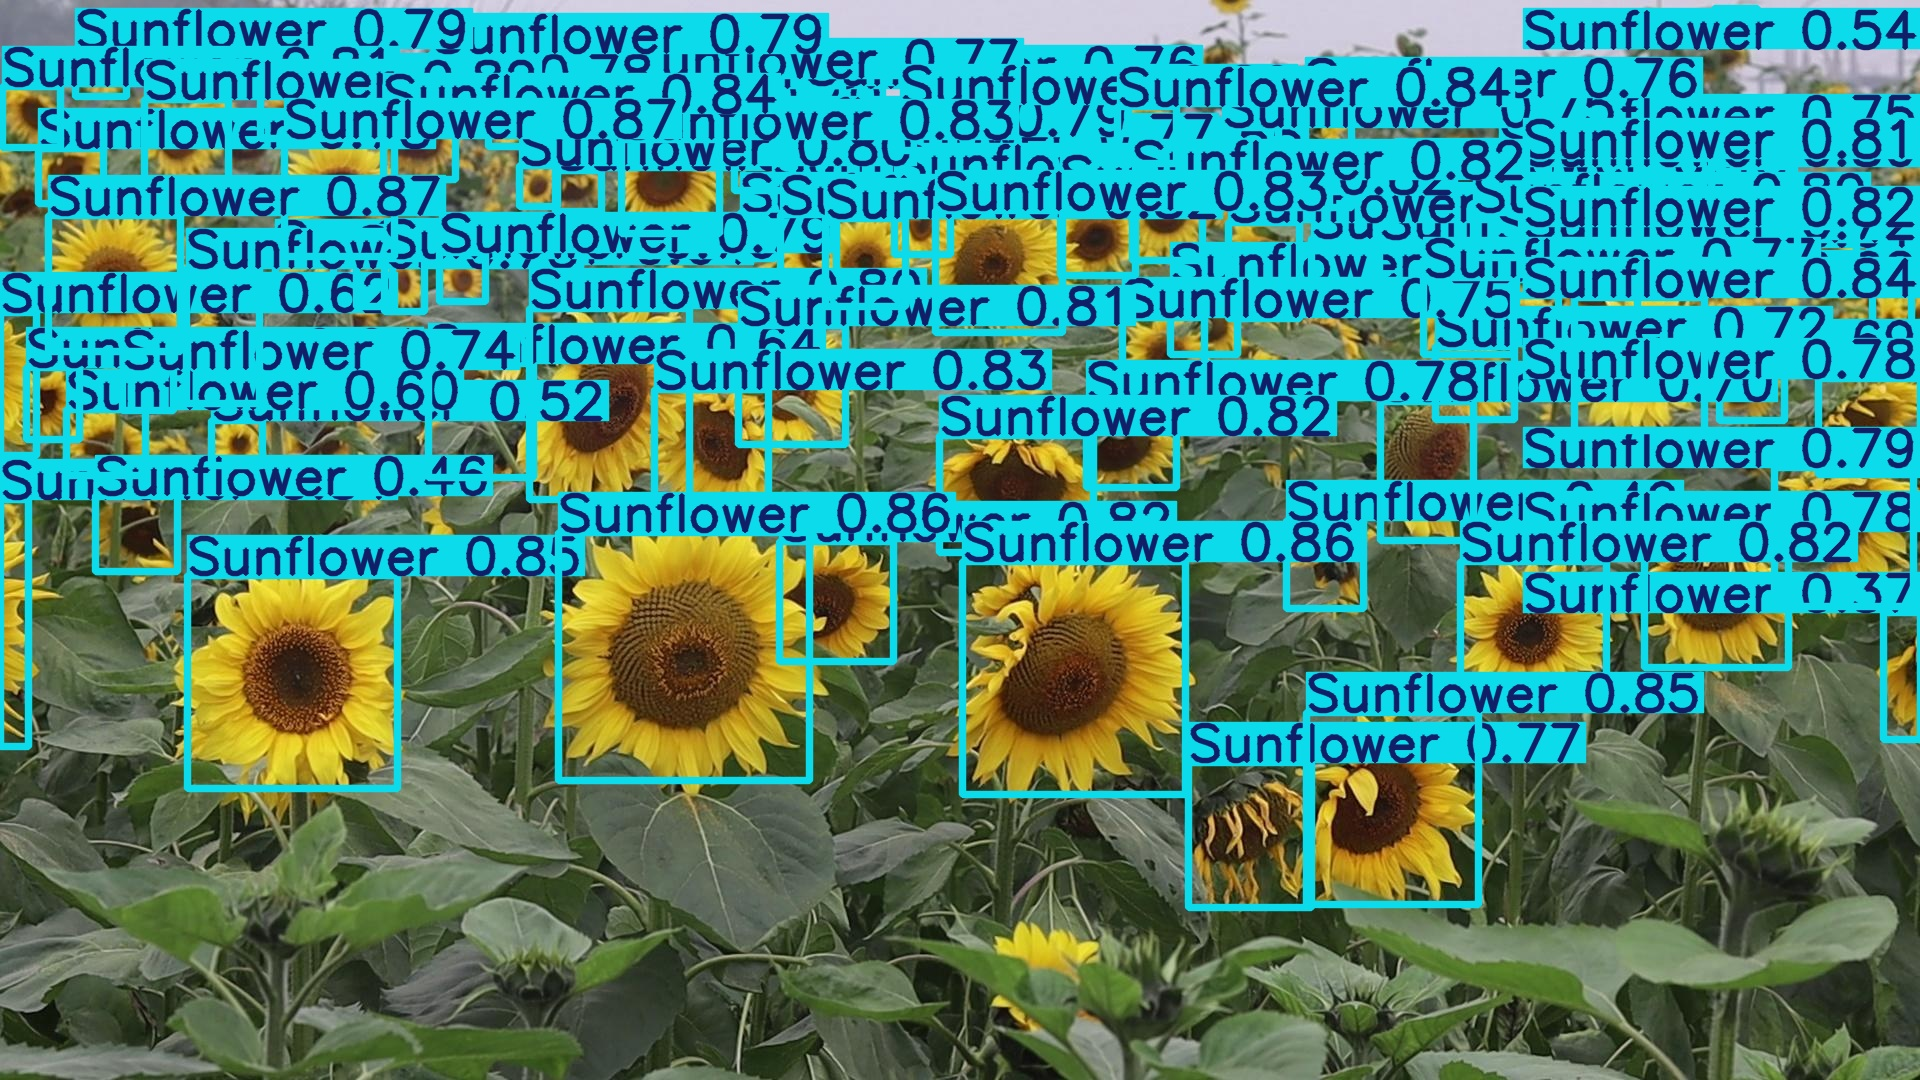

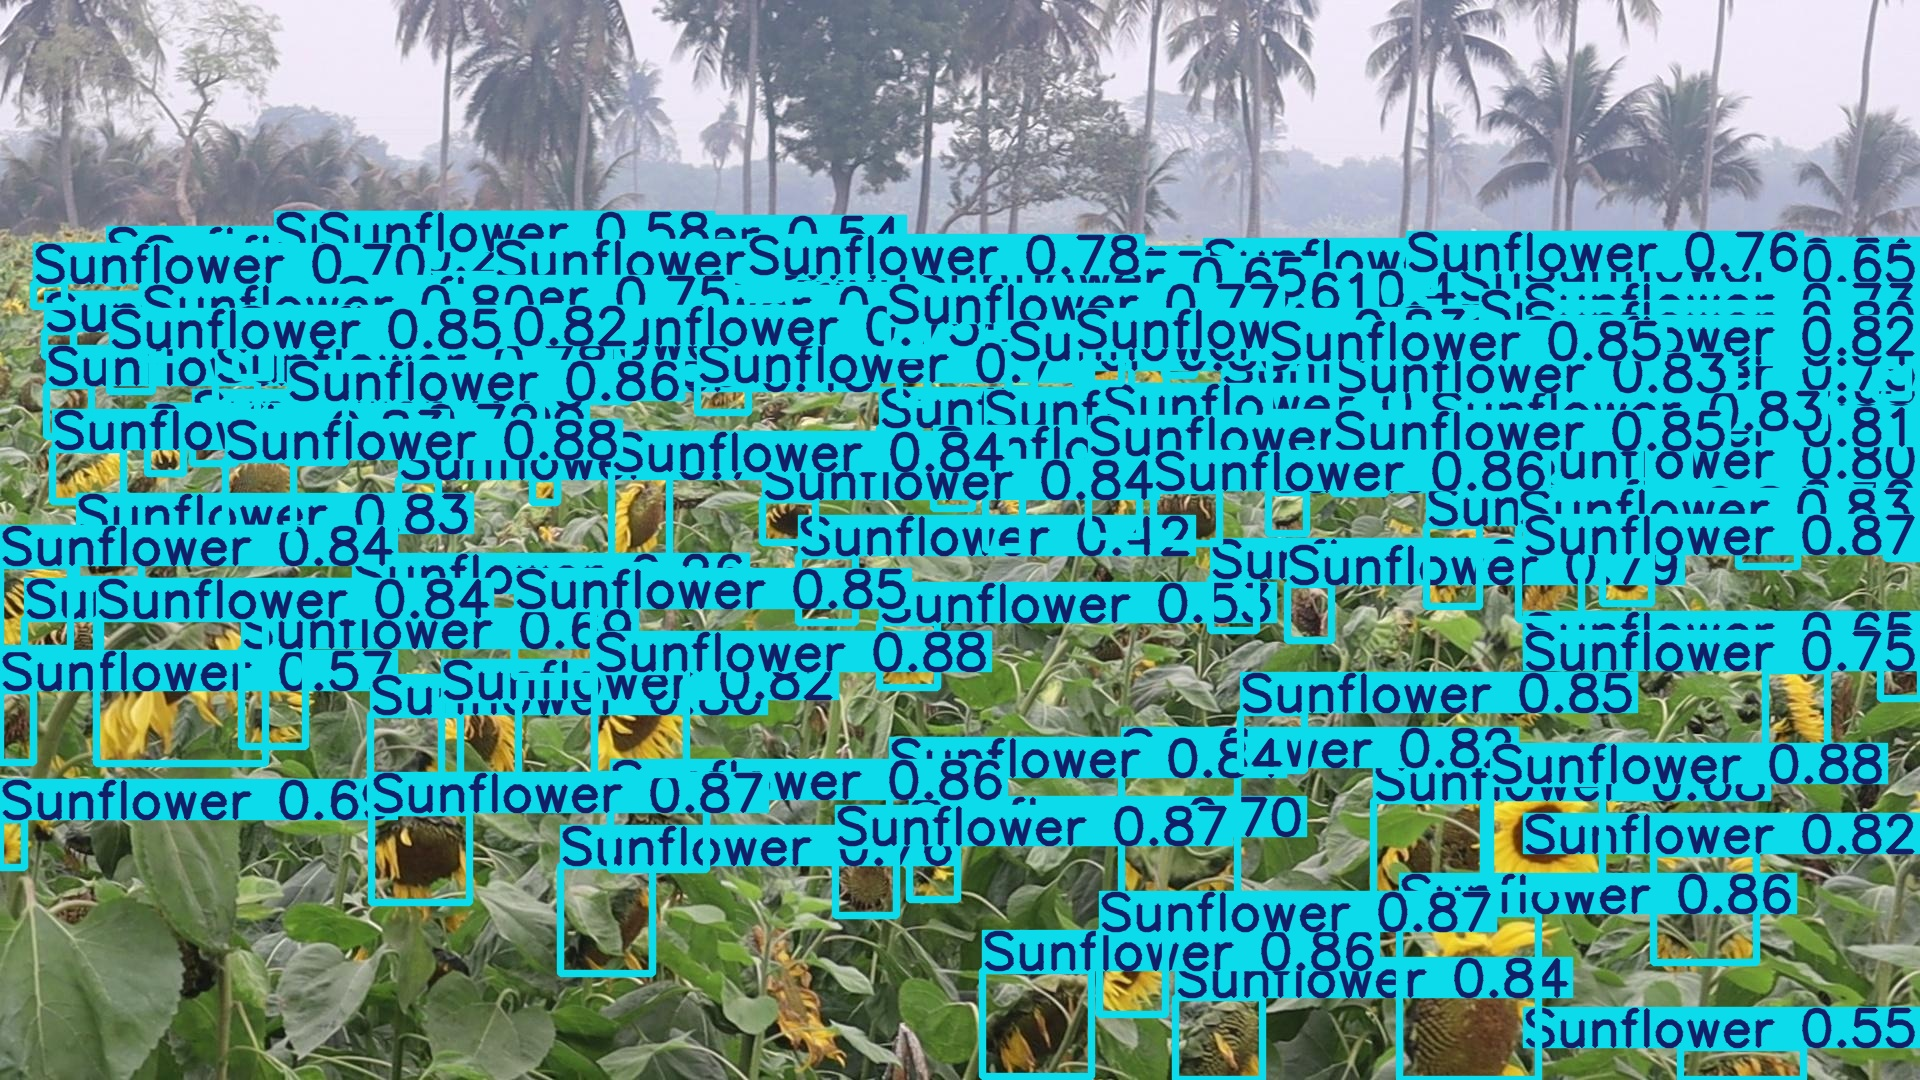

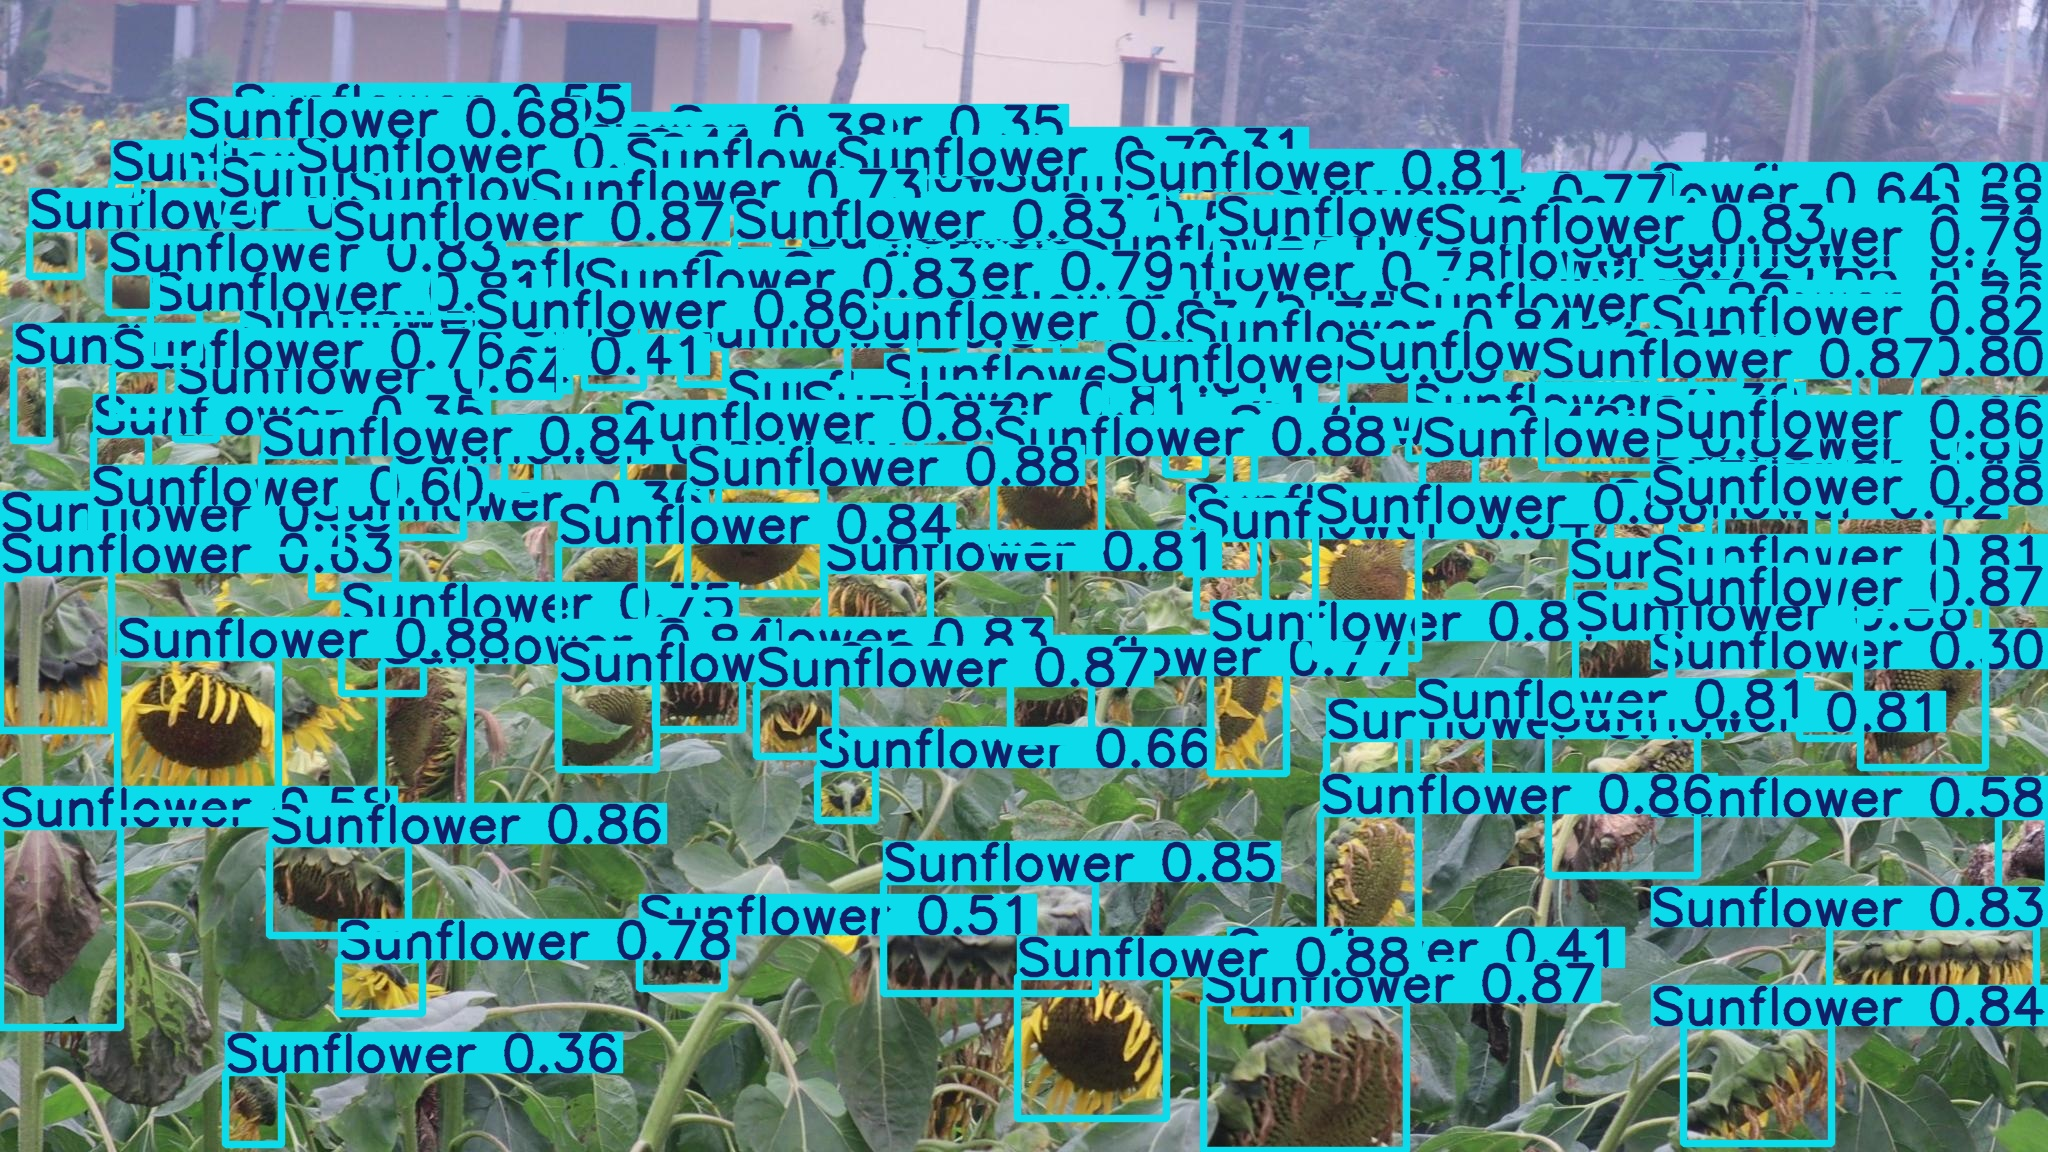

In [14]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
	display(IPyImage(filename=img, width=600))
	print("\n")

In [13]:
import pandas as pd
from tabulate import tabulate


results_csv_path = '/kaggle/working/runs/detect/train/results.csv'
results_df = pd.read_csv(results_csv_path)

accuracy_values = results_df['metrics/mAP50(B)']
precision_values = results_df['metrics/precision(B)']
recall_values = results_df['metrics/recall(B)']

f1_scores = 2 * (precision_values * recall_values) / (precision_values + recall_values)

average_accuracy = accuracy_values.mean()
average_precision = precision_values.mean()
average_recall = recall_values.mean()
average_f1_score = f1_scores.mean()

metrics = {
    'Model': ['YOLOv11'],
    'Accuracy': [f"{average_accuracy:.2%}"],
    'Precision': [f"{average_precision:.2%}"],
    'Recall': [f"{average_recall:.2%}"],
    'F1 score': [f"{average_f1_score:.2%}"]
}

average_metrics_df = pd.DataFrame(metrics)

print(tabulate(average_metrics_df, headers='keys', tablefmt='grid'))

+----+---------+------------+-------------+----------+------------+
|    | Model   | Accuracy   | Precision   | Recall   | F1 score   |
+====+=========+============+=============+==========+============+
|  0 | YOLOv11 | 89.78%     | 85.47%      | 81.48%   | 83.43%     |
+----+---------+------------+-------------+----------+------------+


In [15]:
import numpy as np

csv_file_path = '/kaggle/working/runs/detect/train/results.csv'
data = np.genfromtxt(csv_file_path, delimiter=',', skip_header=1)
print(data)

[[          1      96.408      1.5469      1.0145      1.0041     0.80642     0.77122     0.84356     0.49333      1.3664     0.80881     0.95966  0.00055343  0.00055343  0.00055343]
 [          2      188.19      1.4105     0.74074     0.95359     0.82136     0.78167     0.85653     0.50006      1.3271     0.75185     0.95959   0.0010871   0.0010871   0.0010871]
 [          3      280.12      1.3786     0.71933     0.94574     0.83791     0.79992     0.87284     0.51848      1.2898     0.72846     0.94688   0.0015988   0.0015988   0.0015988]
 [          4       371.6      1.3515     0.70092     0.93976     0.83354     0.79353     0.87275     0.52412      1.2755     0.70144     0.94116    0.001568    0.001568    0.001568]
 [          5      463.86      1.3429     0.68989     0.93474     0.84174     0.80532     0.88427     0.52834       1.277     0.68187     0.94423    0.001535    0.001535    0.001535]
 [          6      555.67      1.3249     0.67679     0.93362     0.85152     0.79615

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


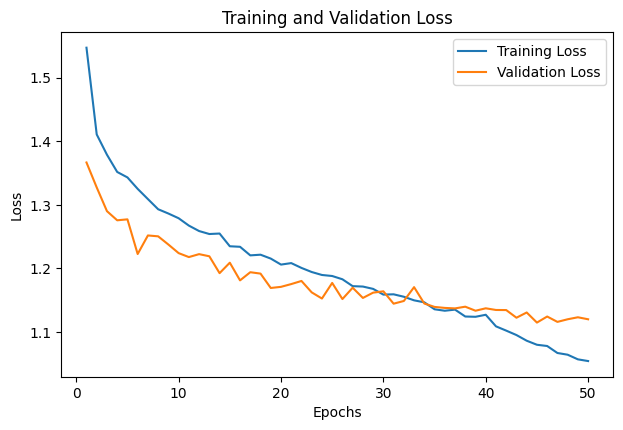

In [16]:


import os
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(data[:, 0], data[:, 1], label='Train Box Loss')
plt.plot(data[:, 0], data[:, 8], label='Val Box Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Box Loss')

plt.subplot(2, 2, 2)
plt.plot(data[:, 0], data[:, 2], label='Training Loss')
plt.plot(data[:, 0], data[:, 9], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')


plt.tight_layout()
plt.show()
